## These visualizations are used to make sense of output audio files

https://www.online-convert.com/result/5eeec9df-5cca-4957-9591-48f013bcae59

In [1]:
audio_in_file = 'tests/sera.wav'

audio_out_file1 = 'tests/sad.wav'
audio_out_file2 = 'tests/happy.wav'
audio_out_file3 = 'tests/suspense.wav'


In [60]:
from scipy.io import wavfile

Fs, x = wavfile.read(audio_out_file1) #sad emotion

print('Audio playback with default settings (normalized audio)')
ipd.display(ipd.Audio(data=x, rate=Fs))

Audio playback with default settings (normalized audio)


In [61]:
from scipy.io import wavfile

Fs, x = wavfile.read(audio_out_file2) #happy

print('Audio playback with default settings (normalized audio)')
ipd.display(ipd.Audio(data=x, rate=Fs))

Audio playback with default settings (normalized audio)


In [62]:
from scipy.io import wavfile

Fs, x = wavfile.read(audio_out_file3) #suspenseful

print('Audio playback with default settings (normalized audio)')
ipd.display(ipd.Audio(data=x, rate=Fs))

Audio playback with default settings (normalized audio)


<class 'numpy.ndarray'> <class 'int'>


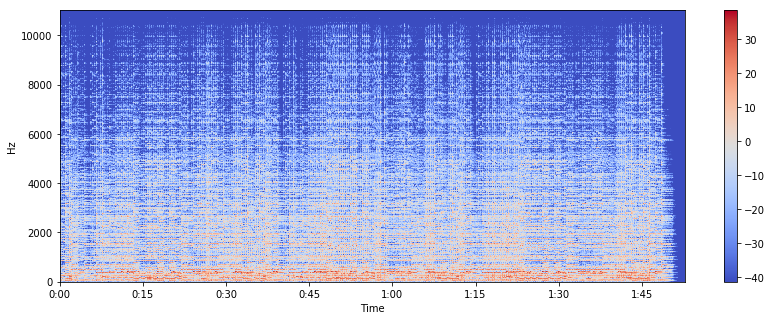

In [4]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import IPython.display as ipd

x , sr = librosa.load(audio_in_file)
print(type(x), type(sr))

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

<class 'numpy.ndarray'> <class 'int'>


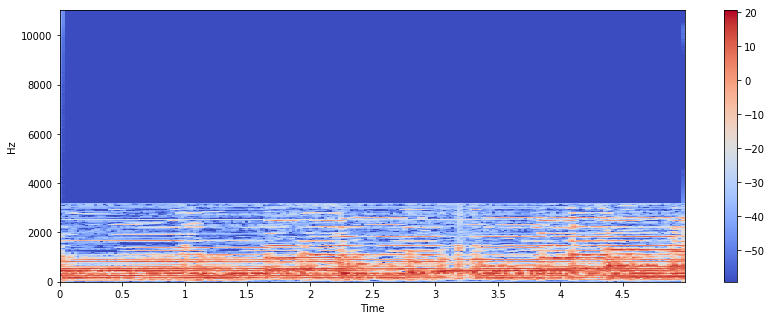

In [3]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import IPython.display as ipd

x , sr = librosa.load(audio_out_file1)
print(type(x), type(sr))

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

<class 'numpy.ndarray'> <class 'int'>


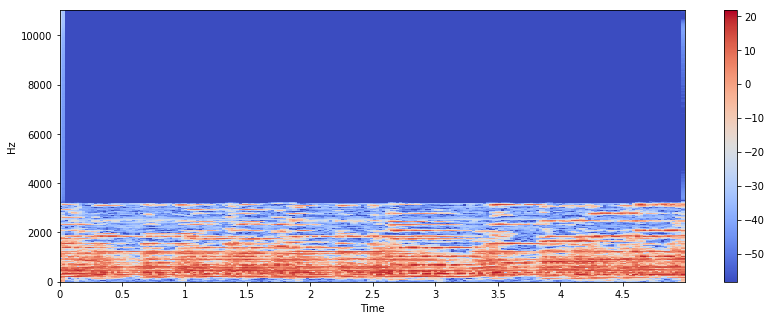

In [5]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import IPython.display as ipd

x , sr = librosa.load(audio_out_file2)
print(type(x), type(sr))

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

<class 'numpy.ndarray'> <class 'int'>


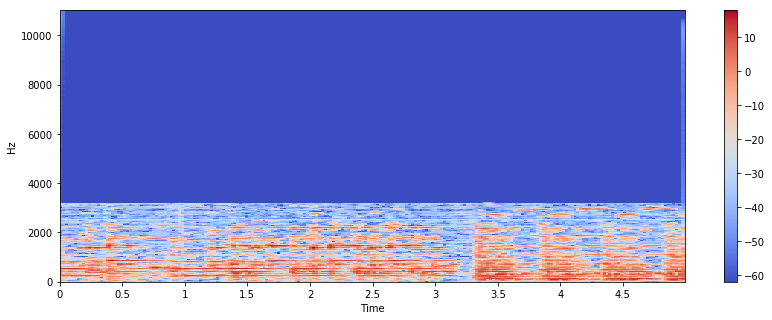

In [6]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import IPython.display as ipd

x , sr = librosa.load(audio_out_file3)
print(type(x), type(sr))

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

## Spectrogram decomposition

https://librosa.github.io/librosa/generated/librosa.decompose.decompose.html

Given a spectrogram S, produce a decomposition into components and activations such that S ~= components.dot(activations).

In [25]:
import numpy as np

y, sr = librosa.load(audio_in_file)
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=8) #obtain file components
comps

array([[7.56300881e-02, 7.76538126e-02, 6.41740293e-02, ...,
        5.74489394e-02, 7.48571612e-02, 9.94954431e-02],
       [1.08745947e-01, 7.63150817e-02, 8.24171519e-02, ...,
        8.04331501e-02, 1.12234512e-01, 1.40332324e-01],
       [1.29476041e-01, 6.65672352e-02, 9.17291219e-02, ...,
        9.52453401e-02, 1.80029668e-01, 1.59547720e-01],
       ...,
       [0.00000000e+00, 4.85258808e-06, 3.08173189e-05, ...,
        1.06965442e-05, 1.89692458e-05, 1.35097592e-05],
       [2.77131182e-06, 1.96084454e-06, 2.65639253e-05, ...,
        7.28489909e-06, 5.44460411e-06, 1.15486986e-05],
       [4.20406683e-07, 0.00000000e+00, 2.49251306e-05, ...,
        5.21393005e-06, 9.99542471e-07, 1.00439355e-05]])

In [26]:
comps, acts = librosa.decompose.decompose(S, n_components=16, sort=True) #sort components by asc peak frequency

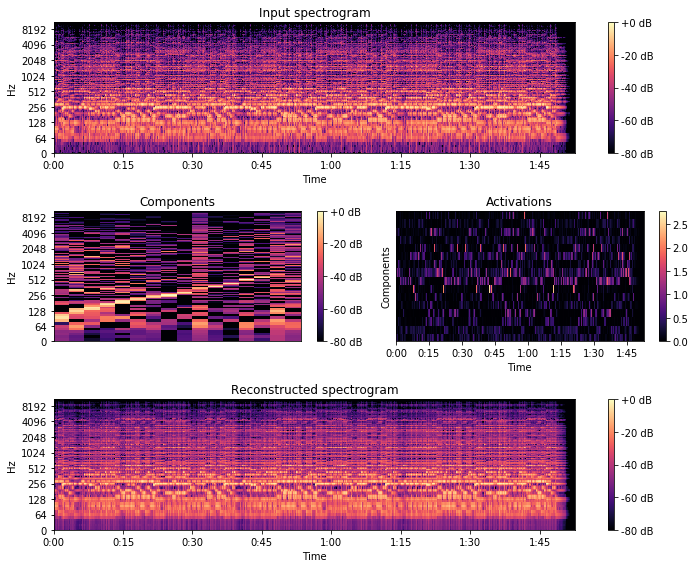

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(comps,ref=np.max),y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(acts, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx = comps.dot(acts)
librosa.display.specshow(librosa.amplitude_to_db(S_approx,ref=np.max),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()
plt.show()

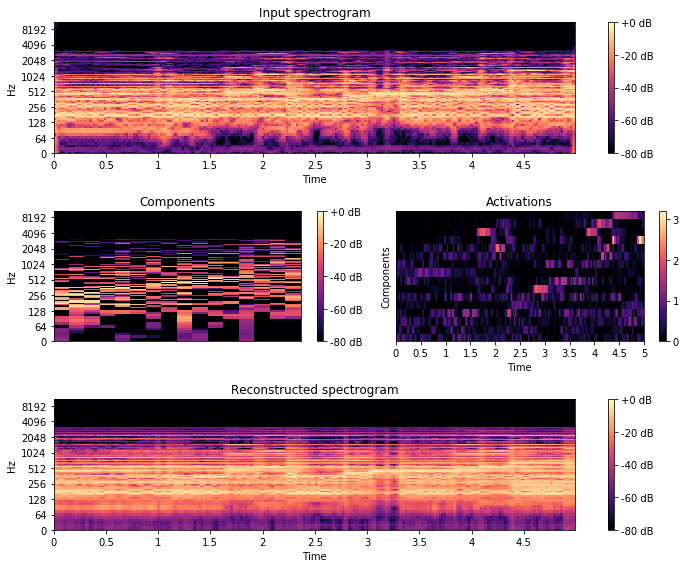

In [28]:
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_out_file1) #sad
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=8) #obtain file components

comps, acts = librosa.decompose.decompose(S, n_components=16, sort=True) #sort components by asc peak frequency

plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(comps,ref=np.max),y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(acts, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx = comps.dot(acts)
librosa.display.specshow(librosa.amplitude_to_db(S_approx,ref=np.max),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()
plt.show()

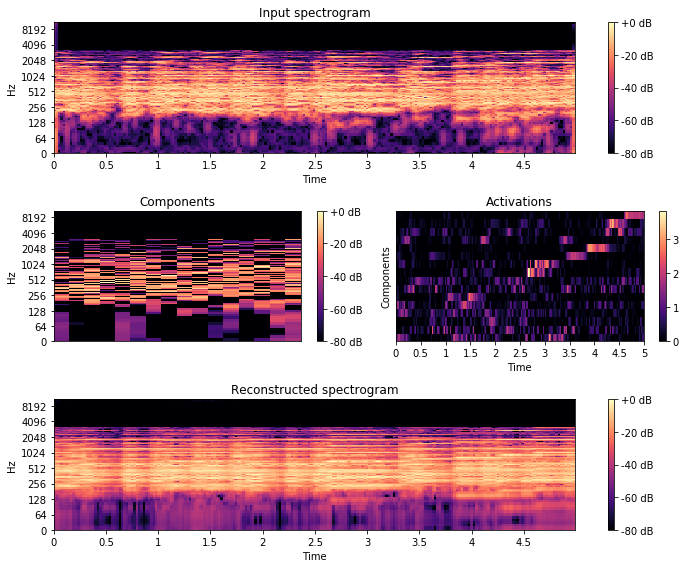

In [57]:
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_out_file2) #happy
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=8) #obtain file components

comps, acts = librosa.decompose.decompose(S, n_components=16, sort=True) #sort components by asc peak frequency

plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(comps,ref=np.max),y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(acts, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx = comps.dot(acts)
librosa.display.specshow(librosa.amplitude_to_db(S_approx,ref=np.max),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()
plt.show()

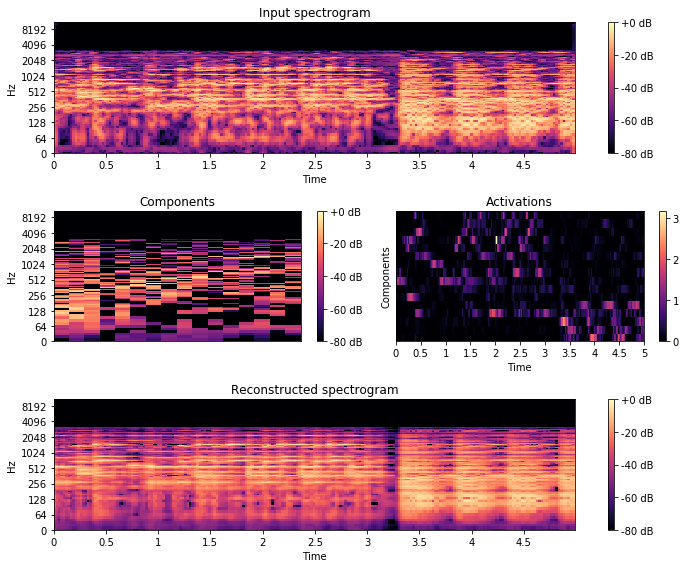

In [58]:
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_out_file3) #suspense
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=8) #obtain file components

comps, acts = librosa.decompose.decompose(S, n_components=16, sort=True) #sort components by asc peak frequency

plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(comps,ref=np.max),y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(acts, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx = comps.dot(acts)
librosa.display.specshow(librosa.amplitude_to_db(S_approx,ref=np.max),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()
plt.show()

## Replace each point in spectrogram using NN

Filtering by nearest-neighbors.

Each data point (e.g, spectrogram column) is replaced by aggregating its nearest neighbors in feature space.

This can be useful for de-noising a spectrogram or feature matrix.

The non-local means method [1] can be recovered by providing a weighted recurrence matrix as input and specifying aggregate=np.average.

Similarly, setting aggregate=np.median produces sparse de-noising as in REPET-SIM [2]

=================

[1]	Buades, A., Coll, B., & Morel, J. M. (2005, June). A non-local algorithm for image denoising. In Computer Vision and Pattern Recognition, 2005. CVPR 2005. IEEE Computer Society Conference on (Vol. 2, pp. 60-65). IEEE.

[2]	Rafii, Z., & Pardo, B. (2012, October). “Music/Voice Separation Using the Similarity Matrix.” International Society for Music Information Retrieval Conference, 2012.

## Evaluation: We can use similarity matrix measure to calculate how similar the generated outputs are to the input music file

In [31]:
y, sr = librosa.load(audio_out_file1)

'''
De-noise a chromagram by non-local median filtering. 
By default this would use euclidean distance to select neighbors, 
but this can be overridden directly by setting the metric parameter.
'''

chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_med = librosa.decompose.nn_filter(chroma,aggregate=np.median,metric='cosine')

#To use non-local means, provide an affinity matrix and aggregate=np.average.
rec = librosa.segment.recurrence_matrix(chroma, mode='affinity',metric='cosine', sparse=True)
chroma_nlm = librosa.decompose.nn_filter(chroma, rec=rec, aggregate=np.average)

                                        

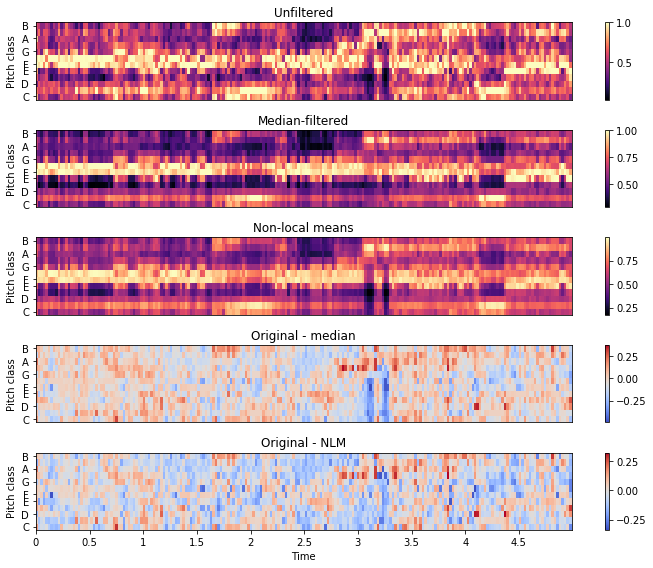

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.subplot(5, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma')
plt.colorbar()
plt.title('Unfiltered')
plt.subplot(5, 1, 2)
librosa.display.specshow(chroma_med, y_axis='chroma')
plt.colorbar()
plt.title('Median-filtered')
plt.subplot(5, 1, 3)
librosa.display.specshow(chroma_nlm, y_axis='chroma')
plt.colorbar()
plt.title('Non-local means')
plt.subplot(5, 1, 4)
librosa.display.specshow(chroma - chroma_med,y_axis='chroma')
plt.colorbar()
plt.title('Original - median')
plt.subplot(5, 1, 5)
librosa.display.specshow(chroma - chroma_nlm,y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Original - NLM')
plt.tight_layout()
plt.show()

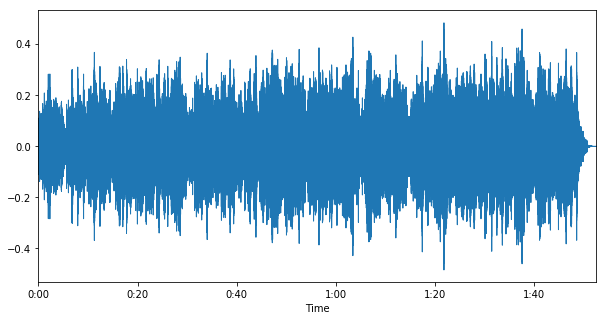

In [10]:
import librosa
import librosa.display

x, sr = librosa.load(audio_in_file)
#Plot the signal:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)

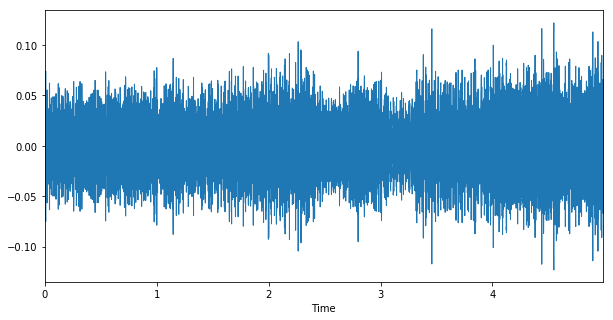

In [9]:
import librosa
import librosa.display

x, sr = librosa.load(audio_out_file1)
#Plot the signal:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)

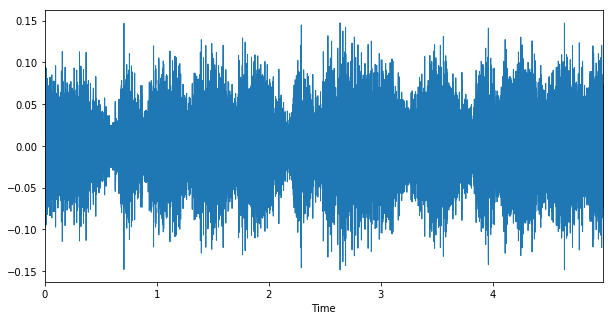

In [11]:
import librosa
import librosa.display

x, sr = librosa.load(audio_out_file2)
#Plot the signal:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)

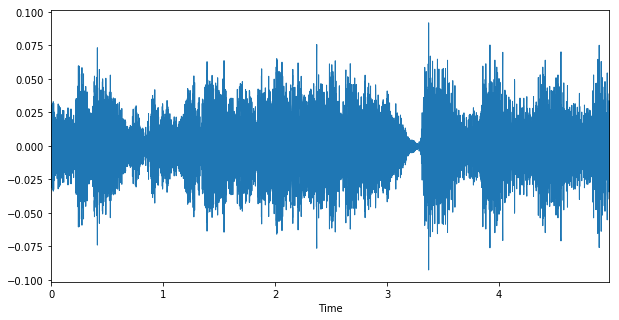

In [12]:
import librosa
import librosa.display

x, sr = librosa.load(audio_out_file3)
#Plot the signal:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)

## Playing wav file

In [15]:
from scipy.io import wavfile

Fs, x = wavfile.read(audio_out_file1)

print('Audio playback with default settings (normalized audio)')
ipd.display(ipd.Audio(data=x, rate=Fs))

Audio playback with default settings (normalized audio)


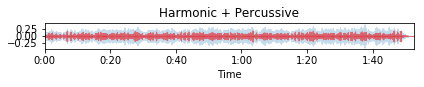

In [18]:
#y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)

y, sr = librosa.load(audio_in_file)
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
plt.show()

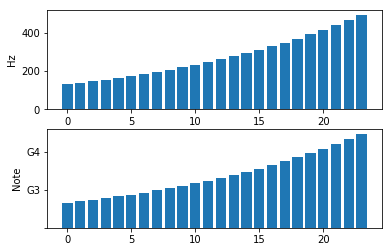

In [22]:
import matplotlib.pyplot as plt
import numpy as np

values = librosa.midi_to_hz(np.arange(48, 72))
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.bar(np.arange(len(values)), values)
ax1.set_ylabel('Hz')
ax2 = plt.subplot(2,1,2)
ax2.bar(np.arange(len(values)), values)
ax2.yaxis.set_major_formatter(librosa.display.NoteFormatter())
ax2.set_ylabel('Note')
plt.show()

## Comparing spectral centroids

https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html

[[1821.14464278 1724.22317543 1560.04638334 ... 4695.40090713
  5722.74396967 6269.91161903]]


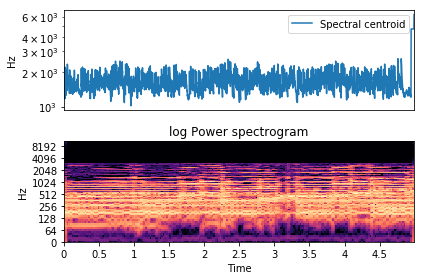

In [38]:
y, sr = librosa.load(audio_in_file)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
print(cent)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()


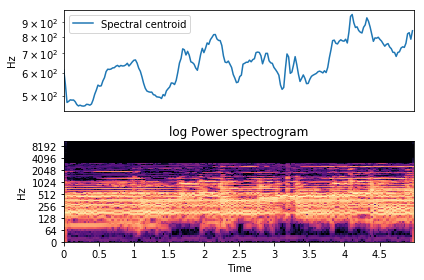

In [40]:
y, sr = librosa.load(audio_out_file1) #sad music
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#print(cent)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

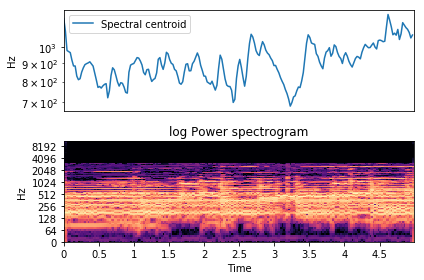

In [41]:
y, sr = librosa.load(audio_out_file2) #happy music
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#print(cent)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

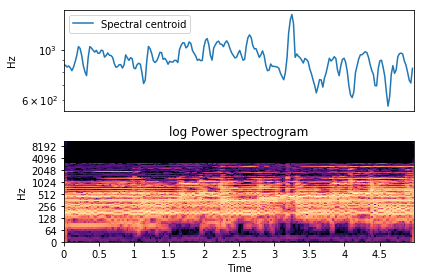

In [42]:
y, sr = librosa.load(audio_out_file3) #suspense music
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#print(cent)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

In [44]:
#!pip install fuzzywuzzy[speedup]

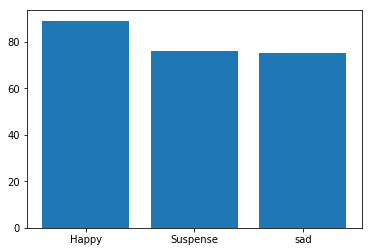

Exception ignored in: <function Wave_write.__del__ at 0x12387b158>
Traceback (most recent call last):
  File "/Users/ssm392/anaconda3/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/Users/ssm392/anaconda3/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/Users/ssm392/anaconda3/lib/python3.7/wave.py", line 468, in _ensure_header_written
    self._write_header(datasize)
  File "/Users/ssm392/anaconda3/lib/python3.7/wave.py", line 485, in _write_header
    self._sampwidth * 8, b'data'))
struct.error: ushort format requires 0 <= number <= (32767 *2 +1)


In [64]:
#The similarity will contain percentages of similarity between input and output files calculated using fuzzy algorithm.
# Rahman, M. S., Rahman, M. S., Chowdhury, S. U. I., Mahmood, A., & Rahman, R. M. (2016, June). 
#A personalized music recommender service based on fuzzy inference system. 
#In 2016 IEEE/ACIS 15th International Conference on Computer and Information Science (ICIS) (pp. 1-6). IEEE.

#https://github.com/seatgeek/fuzzywuzzy

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz

similarity_self = fuzz.ratio(audio_in_file, audio_in_file)

similarity_sad = fuzz.ratio(audio_in_file, audio_out_file1) # finding similarity among files
similarity_happy = fuzz.ratio(audio_in_file, audio_out_file2)
similarity_suspense = fuzz.ratio(audio_in_file, audio_out_file3)

similarity = [similarity_sad,similarity_happy,similarity_suspense]

bars = ('Happy', 'Suspense', 'sad')
y_pos = np.arange(len(bars))
plt.bar(y_pos, similarity)
plt.xticks(y_pos, bars)
plt.show()